# Notebook for testing commands from SSMEstimation Project

In [1]:
import importlib
import os
import sys
import warnings
import win32com.client as com

from scipy.stats import truncnorm
from scipy.ndimage.filters import uniform_filter1d
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
sys.path.append(
    r'C:\Users\fvall\Documents\Research\TrafficSimulation\SSMEstimation')
import classesForSSM, readers # necessary to reload the module later if needed
from readers import DataReader, NGSIMDataReader
from classesForSSM import DataAnalyzer

In [3]:
# Reload after changes
importlib.reload(classesForSSM)
from classesForSSM import DataAnalyzer
from readers import DataReader, NGSIMDataReader

## Function drafts

## Open vissim instance

In [ ]:
network_folder = VissimInterface.networks_folder
network_file = "I710 - MultiSec - 3mi"
# network_file = 'highway_in_and_out_lanes'

In [ ]:
# vissimInt = VissimInterface()
# vissimInt.open_and_set_simulation()
# vissim = vissimInt.vissim

## Commands testing 

In [4]:
data_folder = 'C:\\Users\\fvall\\Documents\\Research\\TrafficSimulation\\post_processed_data\\NGSIM'
data_file = 'us-101'

In [5]:
dr = DataReader(data_folder, data_file)

In [6]:
data = dr.load_from_csv()

### Issue with relative velocities

In [38]:
problem_rows = data['vx'] == data['delta_v']

In [39]:
# "Size" of issue: only about 1% of samples
sum(problem_rows)/data.shape[0]

0.010430355892860208

In [45]:
leader_indices = data[['time', 'leader_id']].loc[problem_rows]

### Moving Average Example 

In [8]:
ttc = df[df['TTC']<float('inf')]['TTC']

In [27]:
N = 100000
moving_avg = uniform_filter1d(ttc, size=N, mode='reflect')

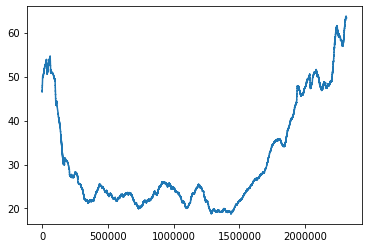

In [28]:
plt.plot(moving_avg)

In [67]:
df.head()

,time,number,veh type,link,lane,x,vx,y,leader number,delta x,delta v,TTC,DRAC,CPI,safe gap,DTSG,time headway gap
0,582.6,11,100,9,3,1565.21,101.09,0.5,11,250.00,0.00,inf,0.0,0.0,0.000000,250.000000,NaN
1,0.0,0,0,0,0,0.00,0.00,0.0,0,0.00,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,582.6,18,100,9,3,1042.09,98.46,0.5,18,250.00,0.00,inf,0.0,0.0,0.000000,250.000000,NaN
3,582.6,21,100,9,3,559.36,95.60,0.5,21,250.00,0.00,inf,0.0,0.0,0.000000,250.000000,NaN
4,582.6,23,100,9,2,493.85,95.39,0.5,40,42.58,-6.39,inf,0.0,0.0,0.240351,42.339649,29.731564


In [83]:
vissim_df[vissim_df['time']==582.6].head()

,time,number,veh type,link,lane,x,vx,y,leader number,delta x
50848,582.6,11,100,9,3,1565.21,101.09,0.5,NaN,250.00
50849,582.6,17,200,9,2,1371.05,100.52,0.5,29.0,179.70
50850,582.6,18,100,9,3,1042.09,98.46,0.5,NaN,250.00
50851,582.6,21,100,9,3,559.36,95.60,0.5,NaN,250.00
50852,582.6,23,100,9,2,493.85,95.39,0.5,40.0,42.58


In [60]:
print(sum(vissim_df[vissim_df['time']>=582.6]['veh type']==200))
print(sum(df['veh type']==200))

429012
326527


In [42]:
df[df['TTC']<float('inf')][['time', 'TTC']].groupby('time').count()

,TTC
time,
0.0,477482
582.6,69
582.8,69
583.0,71
583.2,69
...,...
3599.2,83
3599.4,84
3599.6,81


### Close Vissim

In [ ]:
vissim = None